In [99]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp


In [100]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [101]:
data1=data[['LSTAT','MEDV']]
data2=data[['RM','MEDV']]
data2=data2.rename(columns={'RM':'x', 'MEDV':'y'})

In [102]:
data2.head()
data2['x2']=data2['x']*data2['x']
data2['x3']=data2['x']*data2['x2']
data2['x4']=data2['x']*data2['x3']
data2['xy']=data2['x']*data2['y']
data2['x2y']=data2['x2']*data2['y']

In [103]:
sumx=data2['x'].sum()
sumx2=data2['x2'].sum()
sumx3=data2['x3'].sum()
sumx4=data2['x4'].sum()
sumy=data2['y'].sum()
sumxy=data2['xy'].sum()
sumx2y=data2['x2y'].sum()
n=data2['x'].count()

In [104]:
n

506

In [105]:
data2.head()

,x,y,x2,x3,x4,xy,x2y
0,6.575,24.0,43.230625,284.241359,1868.886938,157.8000,1037.535000
1,6.421,21.6,41.229241,264.732956,1699.850313,138.6936,890.551606
2,7.185,34.7,51.624225,370.920057,2665.060607,249.3195,1791.360608
3,6.998,33.4,48.972004,342.706084,2398.257176,233.7332,1635.664934
4,7.147,36.2,51.079609,365.065966,2609.126456,258.7214,1849.081846


In [106]:
print(sumx,sumy,sumx2,sumx3,sumx4,sumxy,sumx2y)

3180.025 11401.600000000002 20234.598247 130371.03748837899 850799.0450494862 73924.0776 486227.63932039996


In [107]:
A=np.array([[sumx2,sumx,n],[sumx3,sumx2,sumx],[sumx4,sumx3,sumx2]])
B=np.array([sumy,sumxy,sumx2y])

coff=np.linalg.solve(A,B)


In [108]:
coff

array([  2.47012384, -22.64326237,  66.05884748])

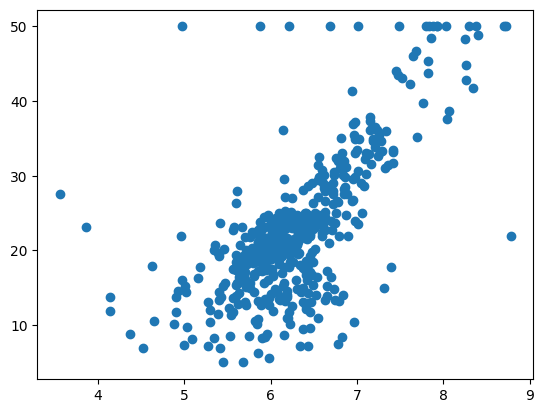

In [109]:
plt.scatter(data['RM'],data['MEDV'])


In [110]:
def soln(x):
    y=coff[0]*(x**2)+coff[1]*x+coff[2]
    return y

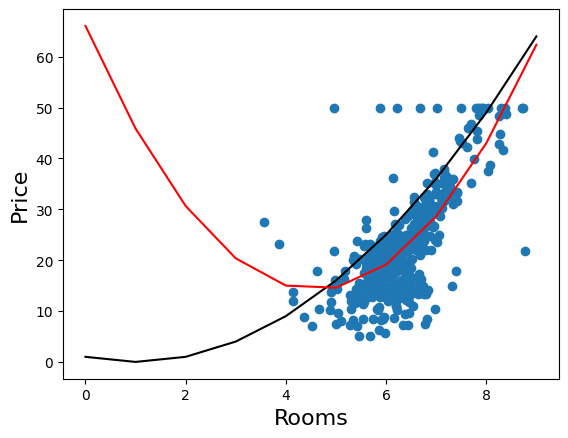

In [111]:
plt.scatter(data2['x'],data2['y'])
array=np.arange(0,10)
plt.xlabel("Rooms",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.plot(array,np.vectorize(lambda x:((x-1)**2)/1)(array),'black')
plt.plot(array,np.vectorize(soln)(array),'r')

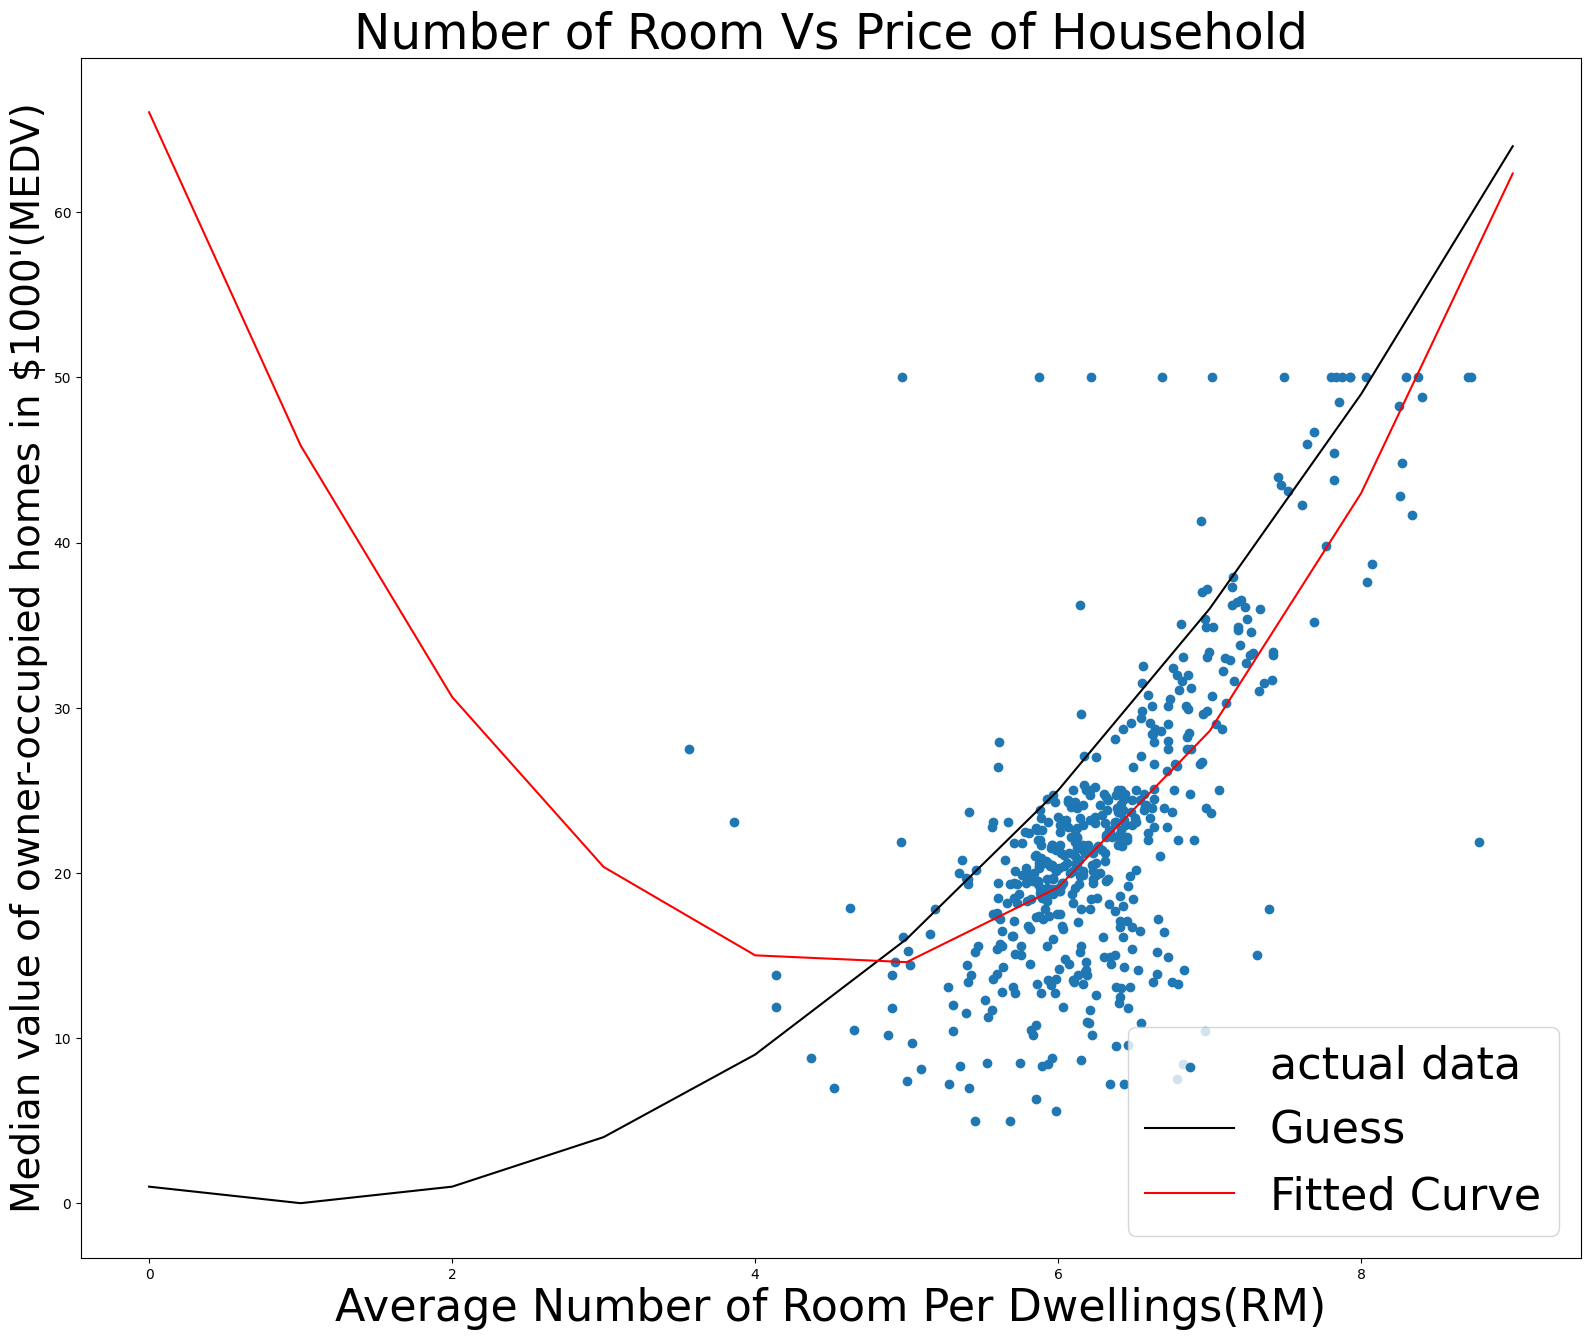

In [112]:
fig=plt.figure(figsize=(15,12))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=32)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=28)
ax.set_title("Number of Room Vs Price of Household",fontsize=35)
ax.scatter(data2['x'],data2['y'],label="actual data")
ax.plot(array,np.vectorize(lambda x:((x-1)**2))(array),'black',label="Guess")
ax.plot(array,np.vectorize(soln)(array),'r',label="Fitted Curve")
ax.legend(loc=4,fontsize=32)

In [113]:
data2['y_predict']=data2['x'].apply(soln)
data2['error']=((data2['y']-data2['y_predict'])/data2['y'])*100
mean_error = data2['error'].mean()
median_error = data2['error'].median()
max_error = data2['error'].max()
min_error = data2['error'].min()
mean=data2['y'].mean()
median=data2['y'].median()


In [114]:
data2.head()

,x,y,x2,x3,x4,xy,x2y,y_predict,error
0,6.575,24.0,43.230625,284.241359,1868.886938,157.8000,1037.535000,23.964395,0.148354
1,6.421,21.6,41.229241,264.732956,1699.850313,138.6936,890.551606,22.507791,-4.202736
2,7.185,34.7,51.624225,370.920057,2665.060607,249.3195,1791.360608,30.885236,10.993555
3,6.998,33.4,48.972004,342.706084,2398.257176,233.7332,1635.664934,28.568212,14.466431
4,7.147,36.2,51.079609,365.065966,2609.126456,258.7214,1849.081846,30.400411,16.020963


In [115]:
data2['error'].describe()

count    506.000000
mean     -10.372607
std       43.067623
min     -248.091768
25%      -15.596289
50%        2.661485
75%       12.181807
max       70.927769
Name: error, dtype: float64

In [116]:
data2['y'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: y, dtype: float64

In [117]:
CV=(data2['y'].std()/mean)*100
print("Cofficient of Variance= ",CV)

Cofficient of Variance=  40.81650529938067


In [118]:
error=data2['error'].mean()
error=abs(error)
error

10.372606726263713

In [119]:
print("Accuracy :",100-error)
print("Error :",error)

Accuracy : 89.62739327373629
Error : 10.372606726263713
